There is given fashion company's 5-day sales data. With this data, I will analyse and comment on the data.

First, we can import libraries that we will be using, after that we can download tthe data and see inside of it.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv(r"C:\Users\gmdemirci\Desktop\SOLVOYO_04.2019\solvoyo.csv")

In [36]:
data.head()

,Date,Store Code,Product Code,Store Stock Quantity,Warehouse Stock Quantity,Sales Quantity,Daily Avg Sales Quantity
0,42370,4,6300249074782,0,43,0,2
1,42370,4,6300250058993,43,60,17,2
2,42370,4,6300250059006,86,146,10,2
3,42370,4,6300250059013,43,94,5,3
4,42370,4,6300250059020,180,26,20,2


When we look at the first 5 rows, it looks like Date translated into integer numbers. We can check them and change into string dates.

In [37]:
data["Date"].unique()

array([42370, 42371, 42372, 42373, 42374], dtype=int64)

Since we know the numbers for the dates, we can switch them into written mode:

In [38]:
data["Date"] = [ "1 Ocak 2016" if each==42370 else each for each in data.Date]
data["Date"] = [ "2 Ocak 2016" if each==42371 else each for each in data.Date]
data["Date"] = [ "3 Ocak 2016" if each==42372 else each for each in data.Date]
data["Date"] = [ "4 Ocak 2016" if each==42373 else each for each in data.Date]
data["Date"] = [ "5 Ocak 2016" if each==42374 else each for each in data.Date]

In [39]:
data.Date.unique()
# it's all good!

array(['1 Ocak 2016', '2 Ocak 2016', '3 Ocak 2016', '4 Ocak 2016',
       '5 Ocak 2016'], dtype=object)

In [72]:
data.describe()

,Store Code,Product Code,Store Stock Quantity,Warehouse Stock Quantity,Sales Quantity,Daily Avg Sales Quantity
count,3680.000000,3.680000e+03,3680.000000,3680.000000,3680.000000,3680.000000
mean,12.500000,6.300250e+12,41.491576,110.835870,7.365217,3.638587
std,5.220863,1.431421e+05,34.591570,102.599103,9.967208,1.629215
min,4.000000,6.300249e+12,0.000000,0.000000,0.000000,2.000000
25%,10.750000,6.300250e+12,17.000000,34.000000,0.000000,2.000000
50%,14.000000,6.300250e+12,34.000000,86.000000,0.000000,4.000000
75%,15.750000,6.300250e+12,51.000000,163.000000,15.000000,5.000000
max,18.000000,6.300251e+12,249.000000,531.000000,50.000000,17.000000


Now first things first, let's check the describe of the data. We can focus on especially "Store Stock Quantity", "Sales Quantity", and "Daily Avg Sales Quantity" since the other data is constant given.
 
"Store Stock Quantity" data has too much std. deviation. Its max. value 249 while its min. value is 0. Also, when its mean value is 41.49, there is a 34.5 standard deviation which is really high. 

"Daily Avg Sales Quantity" data seems perfectly stable, and there is very slightly std. deviation, however "Sales Quantity" is also changing. 

** Let's check average of these data for each day, and see whether there is a outlier:

In [80]:
data.groupby('Date', as_index=False).agg({"Store Stock Quantity": "sum","Sales Quantity":"sum", 
                                          "Daily Avg Sales Quantity":"sum"})

,Date,Store Stock Quantity,Sales Quantity,Daily Avg Sales Quantity
0,1 Ocak 2016,27339,5196,2706
1,2 Ocak 2016,31952,6217,2704
2,3 Ocak 2016,30934,5261,2674
3,4 Ocak 2016,31106,5256,2663
4,5 Ocak 2016,31358,5174,2643


There is no very sharp changing through the days. It looks like there is no abnormal data.

Let's check three important data individually:

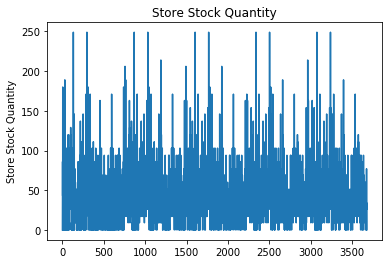

In [90]:
plt.plot(data["Store Stock Quantity"])
plt.ylabel('Store Stock Quantity')
plt.title('Store Stock Quantity')
plt.show()

*Store Stock Quantity* steadily increase and decreasing. There is no extreme point to observe.

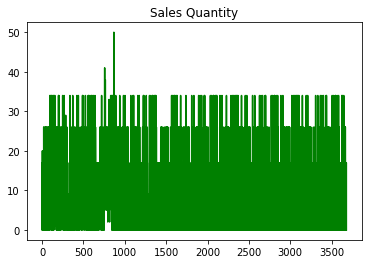

In [89]:
plt.plot(data["Sales Quantity"], color="g")
plt.title('Sales Quantity')
plt.show()

*Sales Quantity* has again ups and downs but the extreme point to focus is not observed.

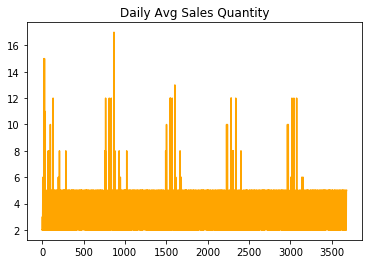

In [88]:
plt.plot(data["Daily Avg Sales Quantity"], color="orange")
plt.title('Daily Avg Sales Quantity')
plt.show()

*Daily Avg. Sales* looks different which leads us to look for the data. The values are almost like a line, however there is sharply increasings.

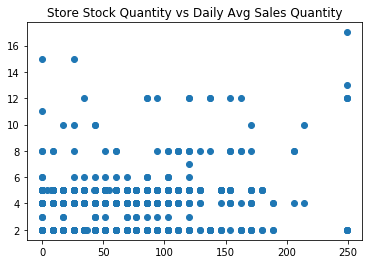

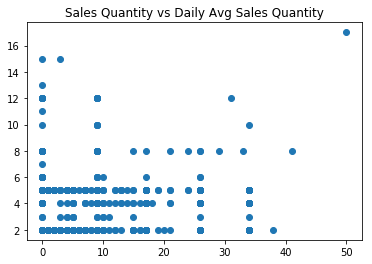

In [95]:
plt.scatter(data["Store Stock Quantity"], data["Daily Avg Sales Quantity"])
plt.title('Store Stock Quantity vs Daily Avg Sales Quantity')
plt.show()

plt.scatter(data["Sales Quantity"], data["Daily Avg Sales Quantity"])
plt.title('Sales Quantity vs Daily Avg Sales Quantity')
plt.show()

*Daily Avg Sales Quantity* values are not related with neither Sales nor Stock quantities. There should be problem.

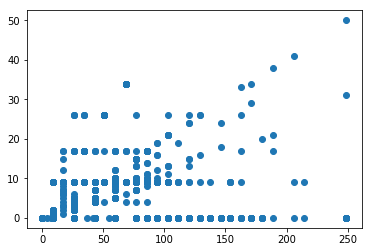

In [97]:
plt.scatter(data["Store Stock Quantity"], data["Sales Quantity"])
plt.title("Store Stock Quantity vs Sales Quantity")
plt.show()

However, eventhough there is no exactlu perfect relation, it can ben seen that there is a slightly positive relationship betweeb Store Stock Quantity and Sales Quantity. This situation makes sense since we know that if there is a stock, customer likely to buy the product. However, from the graphics we can say that, company load too much products on store stock.